# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-v0_8-poster')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Explory Data Analysis

## Read Excel &  Show 5 Rows head

In [2]:
df=pd.read_excel("Data Model - Pizza Sales.xlsx")
df.head()

order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1 2015-01-01   11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01   11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01   11:57:40   
4                 5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

## Column Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


## Column Describe

In [4]:
df.describe()

order_details_id      order_id      quantity  \
count      48620.000000  48620.000000  48620.000000   
mean       24310.500000  10701.479761      1.019622   
min            1.000000      1.000000      1.000000   
25%        12155.750000   5337.000000      1.000000   
50%        24310.500000  10682.500000      1.000000   
75%        36465.250000  16100.000000      1.000000   
max        48620.000000  21350.000000      4.000000   
std        14035.529381   6180.119770      0.143077   

                          order_date    unit_price   total_price  
count                          48620  48620.000000  48620.000000  
mean   2015-06-29 11:03:43.611682560     16.494132     16.821474  
min              2015-01-01 00:00:00      9.750000      9.750000  
25%              2015-03-31 00:00:00     12.750000     12.750000  
50%              2015-06-28 00:00:00     16.500000     16.500000  
75%              2015-09-28 00:00:00     20.250000     20.500000  
max              2015-12-31 00:00:00     35.950000     83.000000  
std                              NaN      3.621789      4.437398

## Column Shape

In [5]:
df.shape

(48620, 12)

## Checking Null Rows Per Column

In [6]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## Name Columns

In [7]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

# Sales Analysis

## Order Date Value Counts

In [8]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: count, dtype: Int64

## Graphic Hours Value Counts

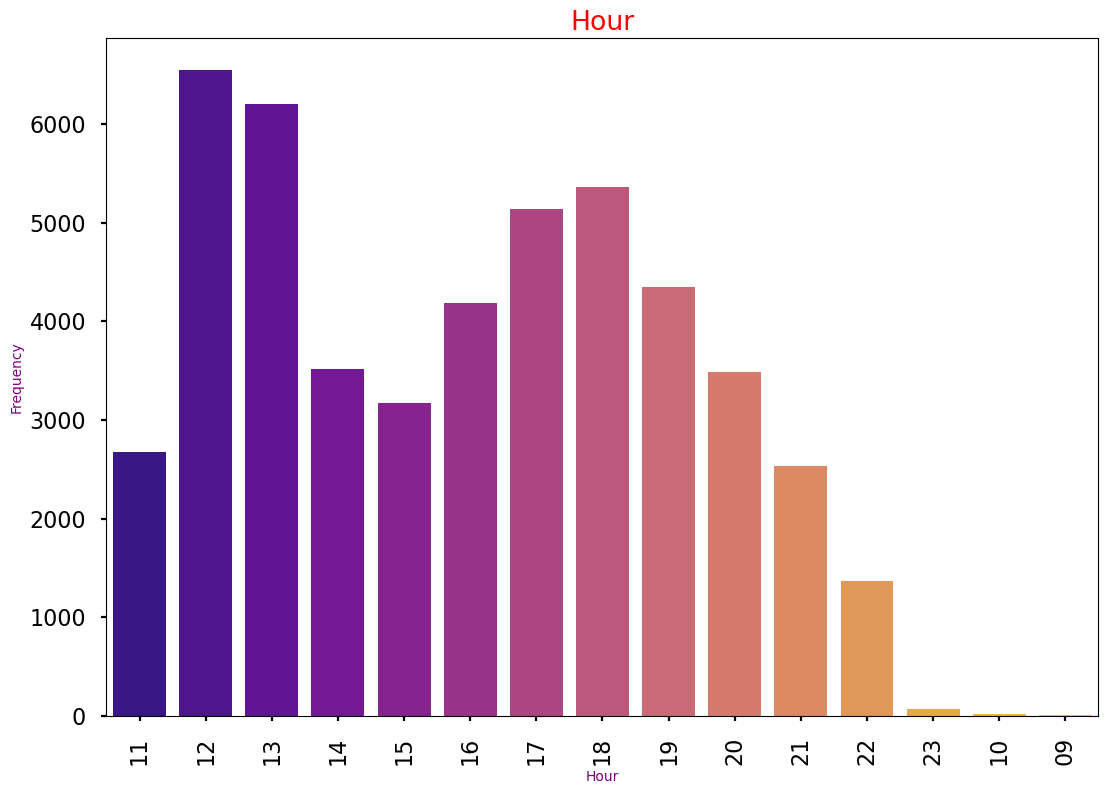

In [9]:
sns.countplot(data=df,x="Hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="purple")
plt.ylabel("Frequency",fontsize=10,color="purple")
plt.title("Hour",color="red")
plt.show()

## Cek Tahun

In [10]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

## Cek Hari Value Counts

In [11]:
df['order_dates'] = df['order_date'].dt.day_name()
df['order_dates'].value_counts()

order_dates
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64

## Graphic Hari

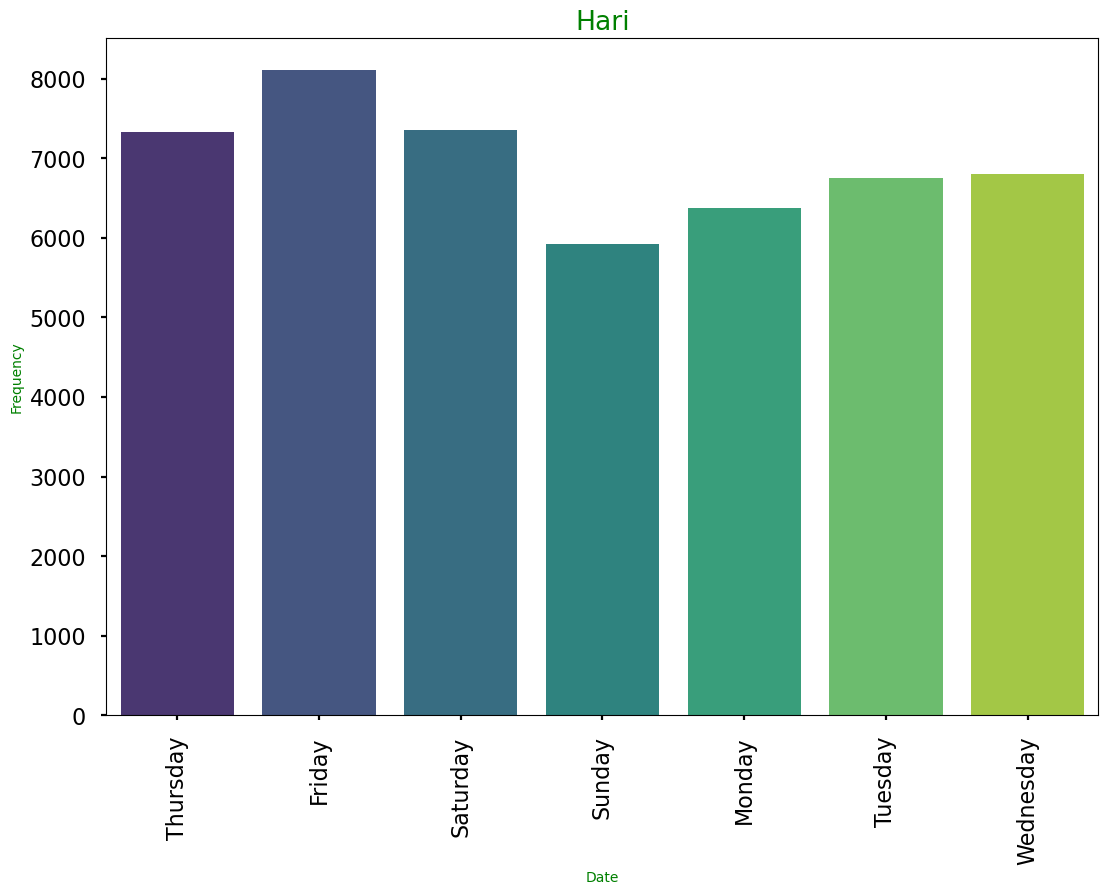

In [12]:
sns.countplot(data=df,x="order_dates",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("Hari",color="green")
plt.show()

##  Mengganti Nama Bulan

In [13]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_25484\3447183166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['order_month'] ==1), 'order_month'] = 'January'


order_month
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: count, dtype: int64

## Graphic Penjulana per Bulan

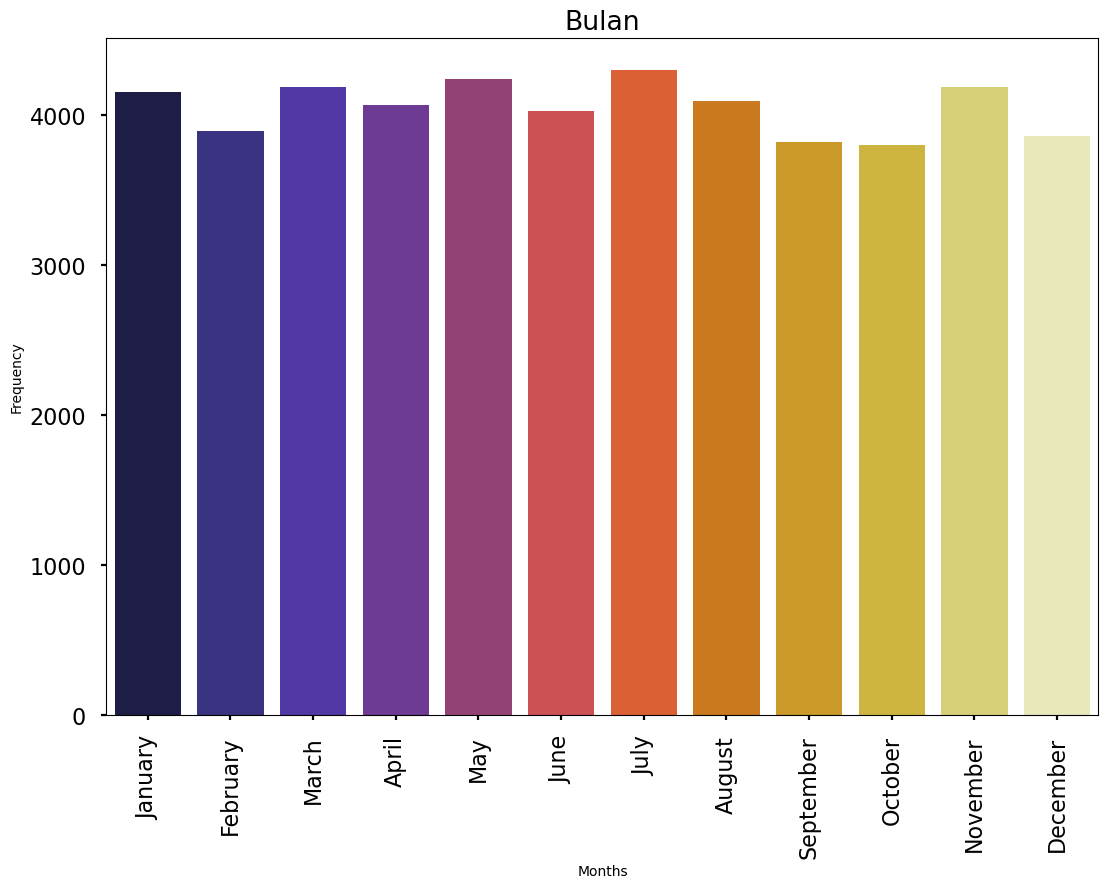

In [14]:
sns.countplot(data=df,x="order_month",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Bulan",color="black")
plt.show()

## ID Pizza Value Counts

In [15]:
df.pizza_id.value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

## Graphic Penjualan Per Pizza ID

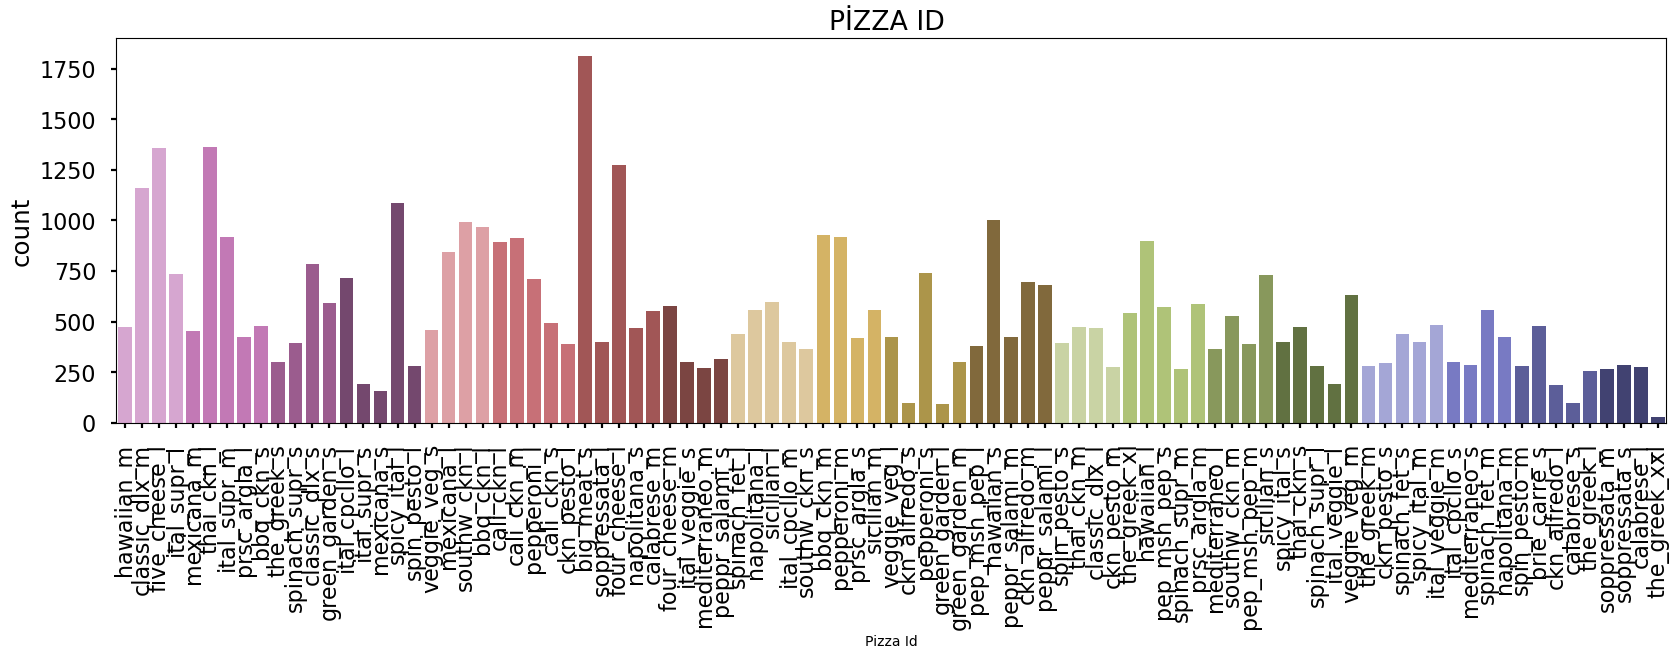

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

## Jumlah Pizza Per Pesanan

In [17]:
df.quantity.value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

## Grahphic Jumlah Pizza Per Pesanan

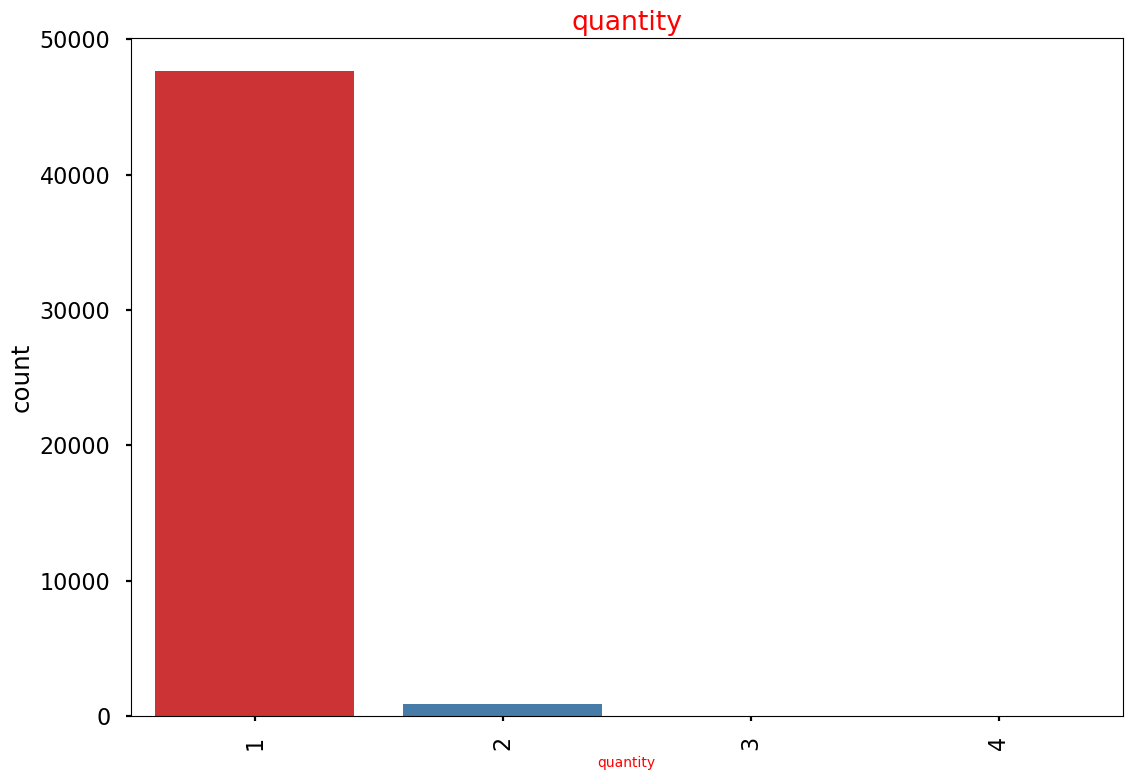

In [18]:
sns.countplot(data=df,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

## Jumlah Pesanan Pizza Per Ukuran

In [19]:
df.pizza_size.value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

## Graphic Ukuran

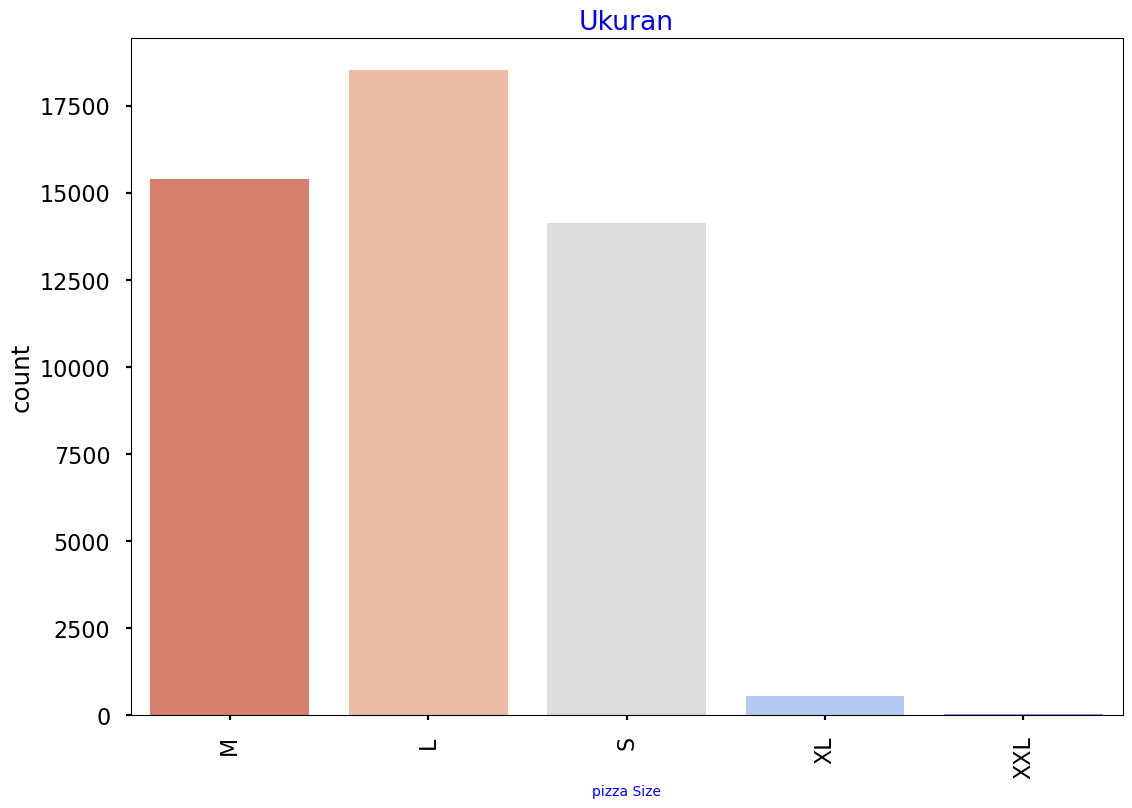

In [20]:
sns.countplot(data=df,x="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10,color="b")
plt.title("Ukuran",color="b")
plt.show()


## Graphic Persentase per Ukuran

In [21]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

## Penjualan Berdasarkan Category

In [22]:
df.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

## Graphic per Kategori Pizza

In [23]:
sns.countplot(data=df,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("Kategori Pizza",color="orange")
plt.show()

## Graphic Persentase Per Kategori Pizza

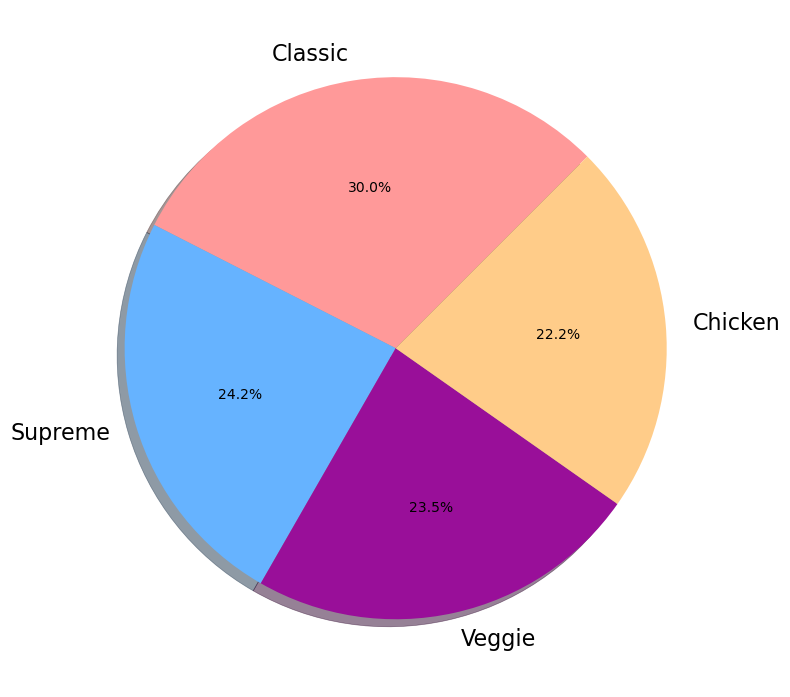

In [24]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

## Graphic Interactive Persentase Ukuran Pizza

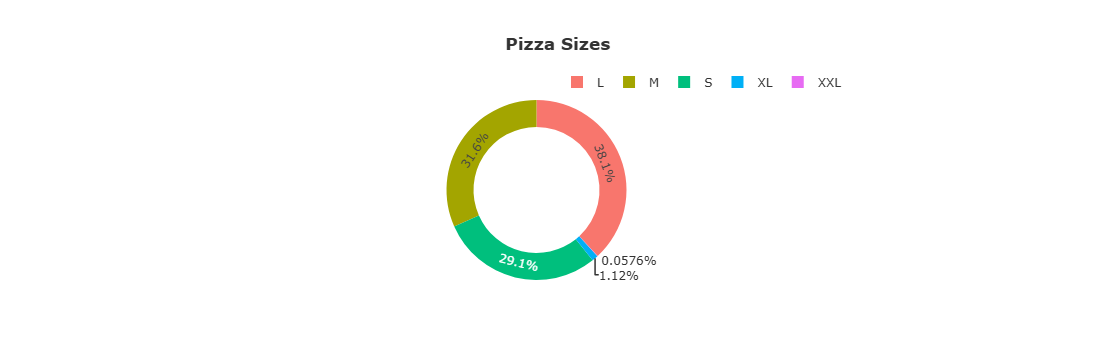

In [25]:
fig=px.pie(df.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',
                                                                                              ascending=False),names='pizza_size',
           values='total_price',color='pizza_size',hole=0.7,labels={'pizza_size':'pizza_size','total_price':'price'},
           template='ggplot2',title='<b>  Pizza Sizes')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

## Bahan per Pizza

In [26]:
df.pizza_ingredients.value_counts()

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

## Jumlah Per Nama Pizza

In [27]:
df.pizza_name.value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

## Jumlah Total Yang didapatkan Per Kategori Pizza

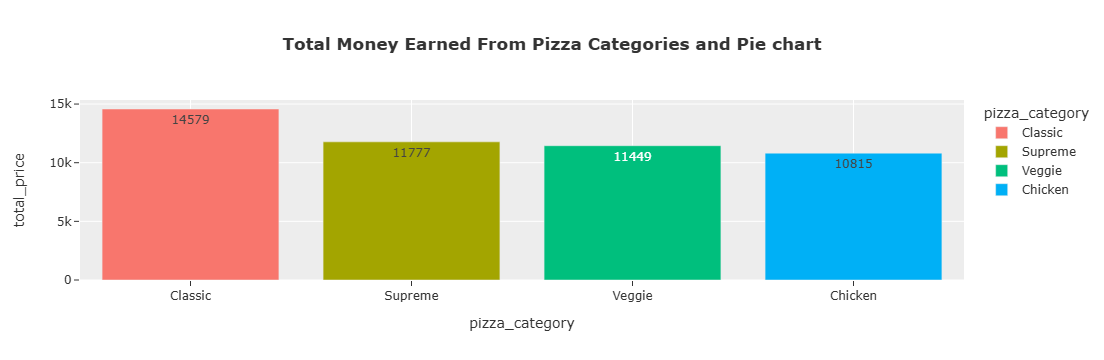

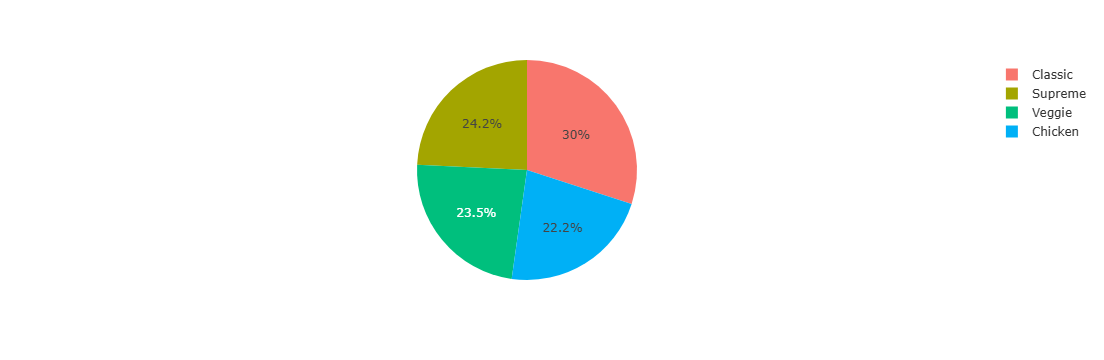

In [28]:
z=df['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

## Graphic Jam dengan Hari Berdasarkan Jumlah Pesanan

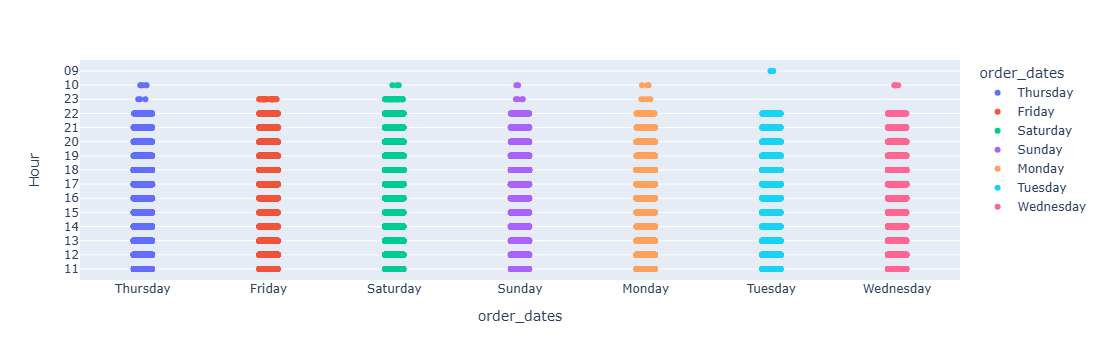

In [29]:
fig = px.strip(df, x='order_dates', y='Hour', color='order_dates')
fig.show()

## Graphic Kateori dan Ukuran Pizza

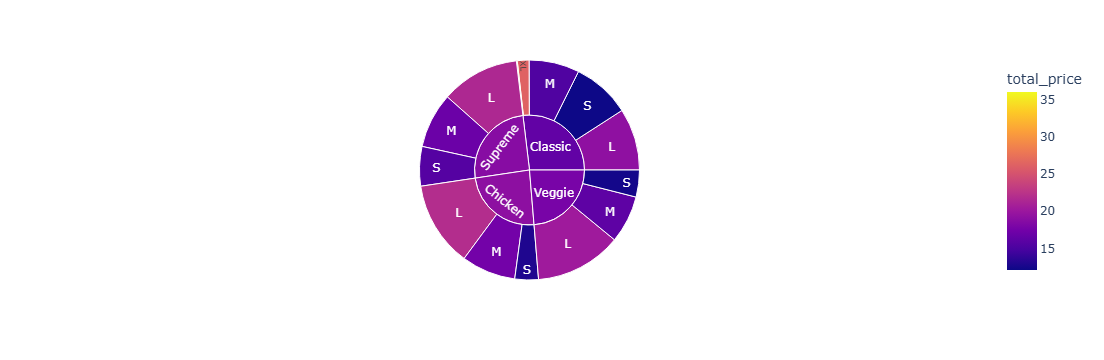

In [30]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

## Word Cloud Untuk Bahan Pizza

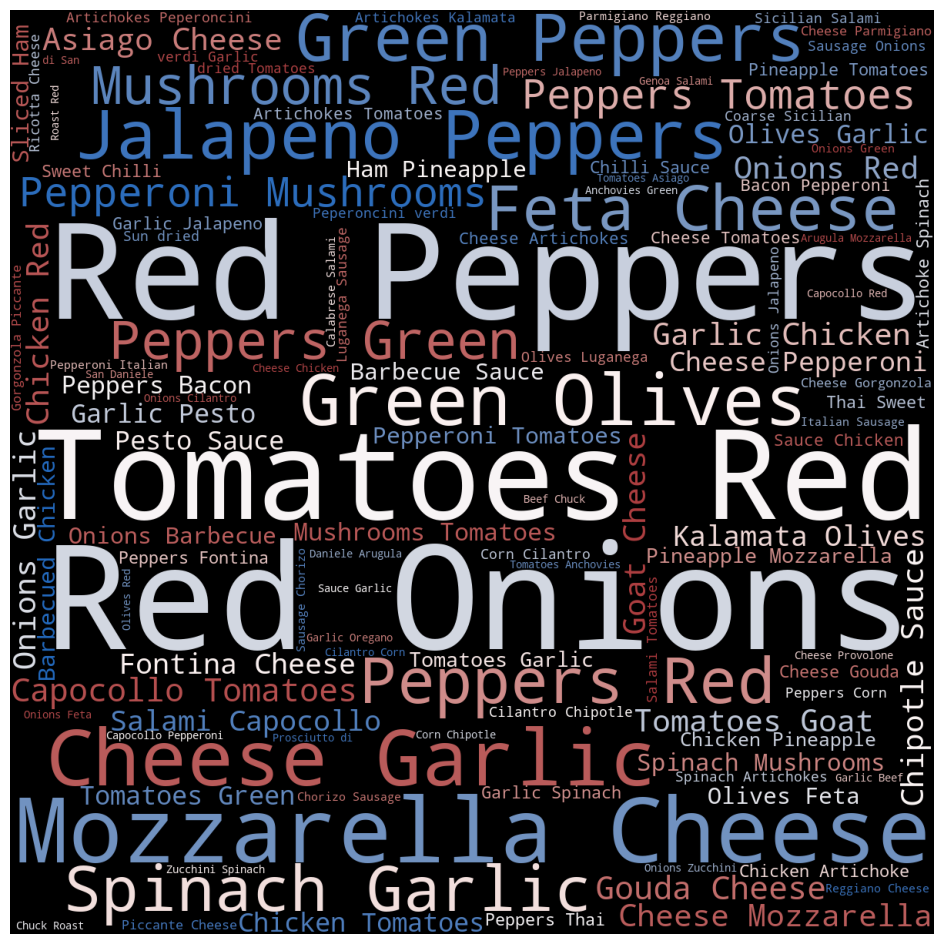

In [31]:
text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()